In [ ]:
#The code below produces a plot of the De Bruijn Newman flow as described in the paper:
#"Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
#It firstly encodes in ARB the DBN-flow equation:
#Xi_lambda(t)=1/sqrt(pi)*int_{-15}^{15} xi(1/2+ti+2*sqrt(lambda)*x)*exp(-x^2) dx
#Secondly, it produces an implicit plot, i.e. it visualises the flow of the real roots of Xi_lambda(t).
#The accuracy of the computations depends on the size of the ComplexBallField (250) and the integral limits (+/-15.
#Both have been set such that Xi_0(60) evaluates correctly at more than 20 digits accuracy. 
#Version 1.0, 23 feb 2024 

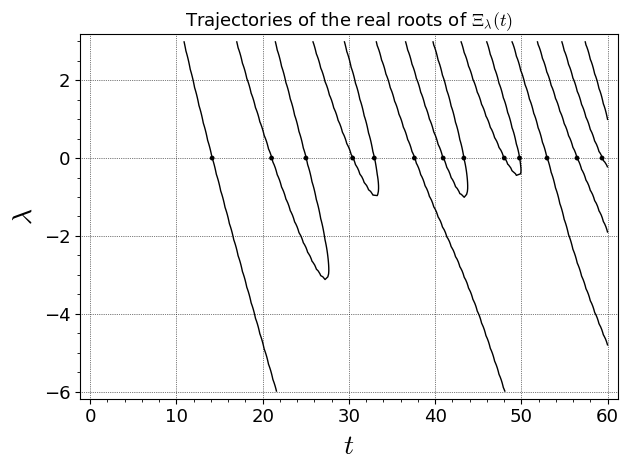

In [3]:
#Plot the De Bruijn Newman flow of real zeros
var("lamb","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
m1 = []
with open("ordinateszetazeros.txt", "r") as f:
    for row in f:
        y=float(row)
        if y < 60:
            m1.append([y,0])

z=list_plot(m1, size=12, marker="o", color = "black")

CCF=ComplexBallField(250)
def xi(t,lamb,x):
    s=CCF("0.5",0)+CCF(I*t)+2*x*CCF(lamb).sqrt()
    xi=s/2*(s-1)*CCF(pi).pow(-s/2)*(s/2).gamma()*s.zeta()
    return xi

def integrand(t,lamb,x):
    expo=-1*CCF(x).pow(2)
    integr=xi(t,lamb,x)*expo.exp()
    return integr

def DBNFlow(t,lamb):
    prefact = 1/CCF(pi).sqrt()
    res= prefact*CCF.integral(lambda x, _: integrand(t,lamb,x), -15, 15)
    return real_part(res)

a=implicit_plot(lambda t,lamb:((RDF(DBNFlow(t,lamb)))),(t,0,60),(lamb,-6,3),color='black', fontsize=13,linestyle ="-",linewidth=1,axes_labels=['$t$','$\lambda$'],title=r'Trajectories of the real roots of $\Xi_{\lambda}(t)$',gridlines=True,plot_points=120)
show(a+z,aspect_ratio='automatic')

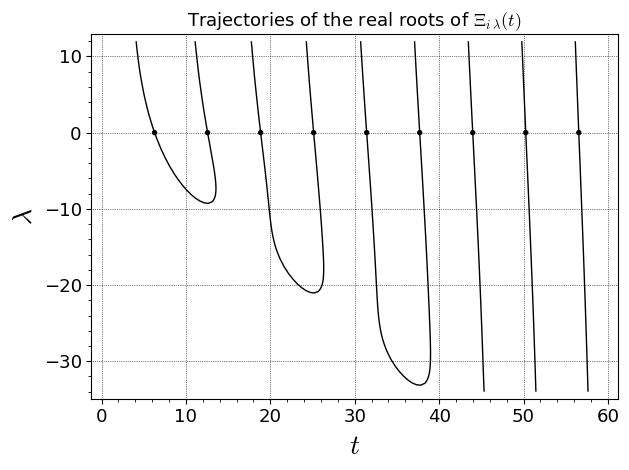

In [96]:
#Plot the De Bruijn Newman flow of real zeros
var("lamb","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

CCF=ComplexBallField(1024)
def Xin(t,lamb,x):
    xin=2*CCF(s/2).sin()/CCF(s)
    return xin

def integrand(t,lamb,x):
    g1 = CCF(lamb)*CCF(x*x)
    g2 = CCF(x)*CCF(t)
    integr=g1.exp()*g2.cos()
    return integr

def DBNFlow(t,lamb):
    res = 2*CCF.integral(lambda x, _: integrand(t,lamb,x), 0, CCF("0.5"))
    return (res)

a=implicit_plot(lambda t,lamb:(((DBNFlowi(t,lamb)))),(t,0,60),(lamb,-34,12),color='black', fontsize=13,linestyle ="-",linewidth=1,axes_labels=['$t$','$\lambda$'],title=r'Trajectories of the real roots of $\Xi_{i\,\lambda}(t)$',gridlines=True,plot_points=120)
show(a+z1,aspect_ratio='automatic')

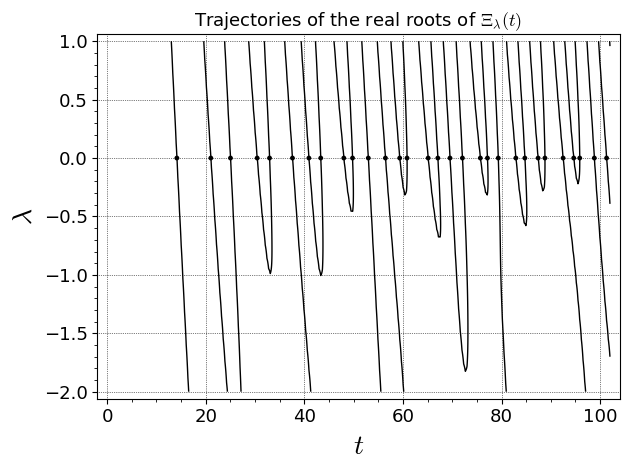

In [11]:
#Plot the De Bruijn Newman flow of real zeros
var("lamb","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
m1 = []
with open("ordinateszetazeros.txt", "r") as f:
    for row in f:
        y=float(row)
        if y < 102:
            m1.append([y,0])

z=list_plot(m1, size=12, marker="o", color = "black")

CCF=ComplexBallField(250)
def xi(t,lamb,x):
    s=CCF("0.5",0)+CCF(I*t)+2*x*CCF(lamb).sqrt()
    xi=s/2*(s-1)*CCF(pi).pow(-s/2)*(s/2).gamma()*s.zeta()
    return xi

def integrand(t,lamb,x):
    expo=-1*CCF(x).pow(2)
    integr=xi(t,lamb,x)*expo.exp()
    return integr

def DBNFlow(t,lamb):
    prefact = 1/CCF(pi).sqrt()
    res= prefact*CCF.integral(lambda x, _: integrand(t,lamb,x), -15, 15)
    return real_part(res)

a=implicit_plot(lambda t,lamb:((RDF(DBNFlow(t,lamb)))),(t,0,102),(lamb,-2,1),color='black', fontsize=13,linestyle ="-",linewidth=1,axes_labels=['$t$','$\lambda$'],title=r'Trajectories of the real roots of $\Xi_{\lambda}(t)$',gridlines=True,plot_points=300)
show(a+z,aspect_ratio='automatic')